In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier




import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Part A Q1

In [31]:
data_raw = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

In [32]:
data_raw.shape

(420, 18)

In [33]:
data_raw.head(10)

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


In [34]:
df = data_raw.iloc[:,5:16] #remove last two columns

In [35]:
df.head(5)

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


# Part A Q2

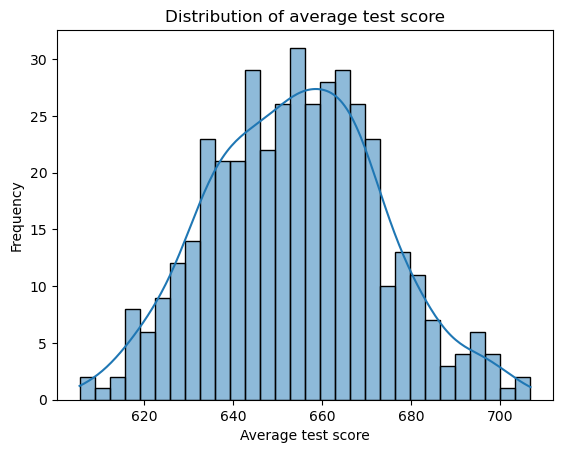

In [36]:
sns.histplot(df['testscr'], bins=30, kde=True)
plt.title('Distribution of average test score')
plt.xlabel('Average test score')
plt.ylabel('Frequency')
plt.show()

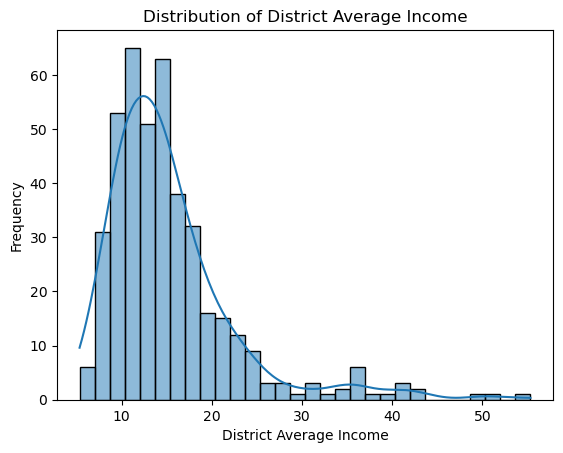

In [37]:
sns.histplot(df['avginc'], bins=30, kde=True)
plt.title('Distribution of District Average Income')
plt.xlabel('District Average Income')
plt.ylabel('Frequency')
plt.show()

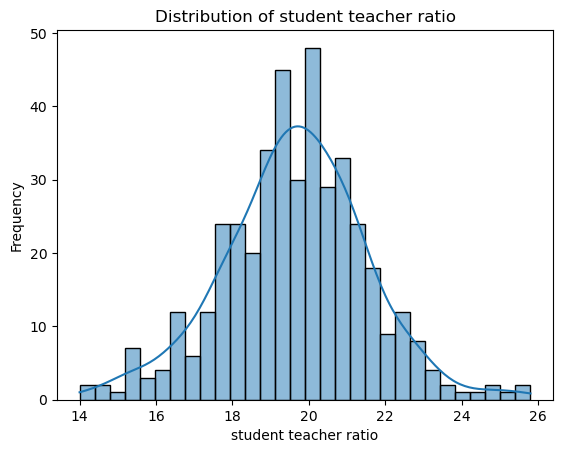

In [38]:
sns.histplot(df['str'], bins=30, kde=True)
plt.title('Distribution of student teacher ratio')
plt.xlabel('student teacher ratio')
plt.ylabel('Frequency')
plt.show()

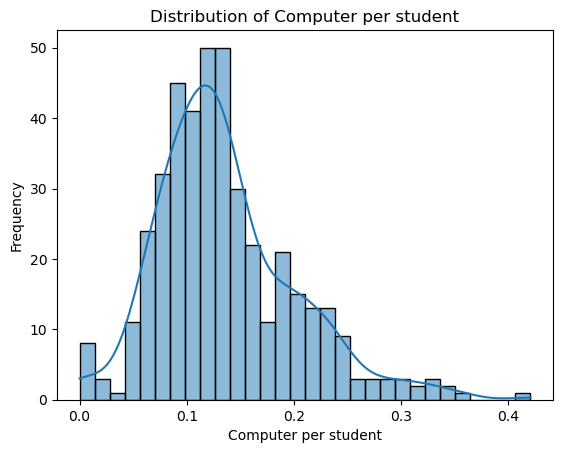

In [39]:
sns.histplot(df['compstu'], bins=30, kde=True)
plt.title('Distribution of Computer per student')
plt.xlabel('Computer per student')
plt.ylabel('Frequency')
plt.show()

# Part A Q3

Text(0, 0.5, 'Average Test Score')

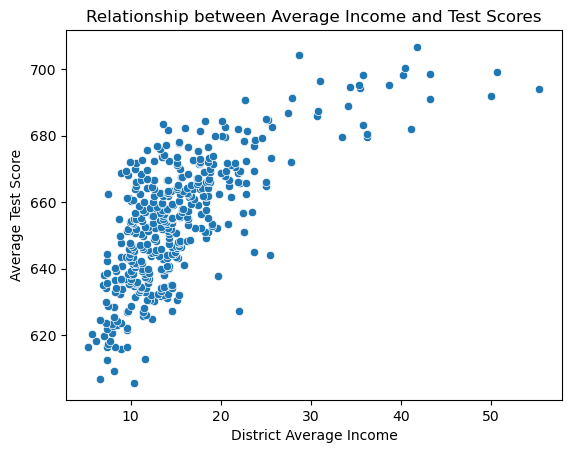

In [40]:
sns.scatterplot(data=df, x='avginc', y='testscr')
plt.title('Relationship between Average Income and Test Scores')
plt.xlabel('District Average Income')
plt.ylabel('Average Test Score')

Text(0, 0.5, 'Average Test Score')

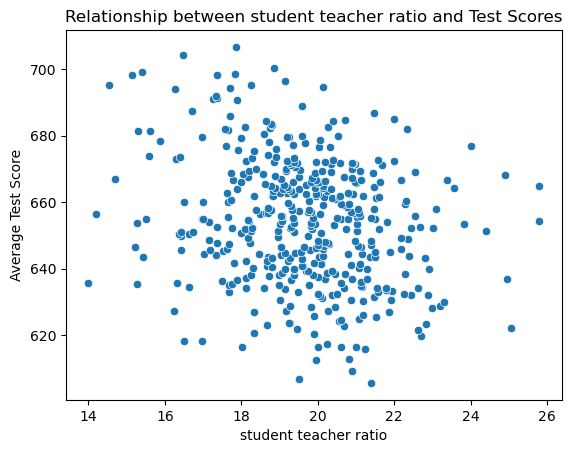

In [41]:
sns.scatterplot(data=df, x='str', y='testscr')
plt.title('Relationship between student teacher ratio and Test Scores')
plt.xlabel('student teacher ratio')
plt.ylabel('Average Test Score')

Text(0, 0.5, 'Average Test Score')

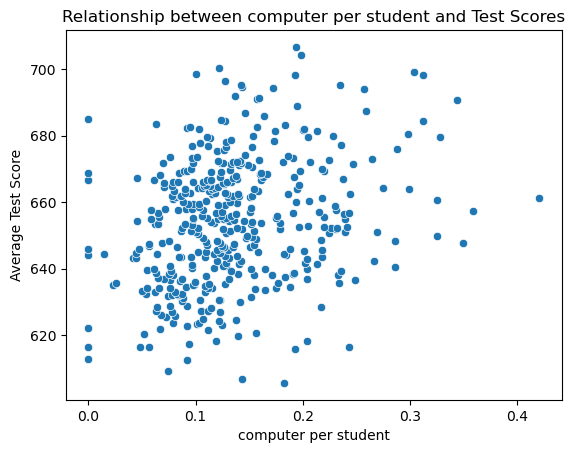

In [42]:
sns.scatterplot(data=df, x='compstu', y='testscr')
plt.title('Relationship between computer per student and Test Scores')
plt.xlabel('computer per student')
plt.ylabel('Average Test Score')

# Part A Q4

In [43]:
X = df.loc[:, df.columns != 'testscr']
y = df['testscr']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_test.head(10), X_test.shape)
print('-------------')
print(y_test.head(10), y_test.shape)

     enrltot    teachers    calwpct    mealpct  computer   compstu  \
145     4612  232.970001  17.476101  65.915001       601  0.130312   
334      187    9.760000  17.553200  44.680901        37  0.197861   
175      575   35.099998  26.434799  59.130402        59  0.102609   
369      516   21.500000   0.969000  27.713200        50  0.096899   
416     3724  208.479996   1.074100   1.503800       721  0.193609   
73     11474  542.650024  40.552601  77.008904      1248  0.108768   
132     7887  391.859985  16.402399  57.072201      1004  0.127298   
137      275   13.000000  12.727300  45.818199         4  0.014545   
30      4142  201.000000  35.562500  81.506500       569  0.137373   
72       499   30.000000  40.367001  83.119301        94  0.188377   

         expnstu        str     avginc      elpct  
145  5124.836426  19.796539  12.827000  16.652212  
334  4357.826172  19.159836   9.485000   8.556149  
175  5504.025391  16.381767  14.228000   8.173913  
369  4392.679688  24.

In [44]:
#KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print('Cross Validation Score:')
print(np.mean(cross_val_score(KNeighborsRegressor(), X_train, y_train, scoring="r2")))

Training set score: 0.30
Cross Validation Score:
-0.05399014482377114


In [45]:
#Linear Regression (OLS)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print('Cross Validation Score:')
print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, scoring="r2")))

Training set score: 0.81
Test set score: 0.81
Cross Validation Score:
0.7807020742805932


In [46]:
#Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print('Cross Validation Score:')
print(np.mean(cross_val_score(Ridge(), X_train, y_train, scoring="r2")))

Training set score: 0.81
Test set score: 0.81
Cross Validation Score:
0.7826902950592989


In [47]:
#Lasso
lasso = Lasso(max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

print('Cross Validation Score:')
print(np.mean(cross_val_score(Lasso(max_iter=10000), X_train, y_train, scoring="r2")))

Training set score: 0.80
Test set score: 0.81
Cross Validation Score:
0.7867594997084577


KNN score is very low, but OLS, Ridge and Lasso are relatively similar

# Part A Q5

In [48]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [49]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print(knn.score(X_test_scaled, y_test))
print('Cross Validation Score:')
print(np.mean(cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, scoring="r2")))

0.7689310586146225
Cross Validation Score:
0.7111400899098527


In [50]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print("Training set score: {:.5f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(lr.score(X_test_scaled, y_test)))
print('Cross Validation Score:')
print(np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, scoring="r2")))

Training set score: 0.80547
Test set score: 0.80702
Cross Validation Score:
0.7807020742805932


In [51]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("Training set score: {:.5f}".format(ridge.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(ridge.score(X_test_scaled, y_test)))

print('Cross Validation Score:')
print(np.mean(cross_val_score(Ridge(), X_train_scaled, y_train, scoring="r2")))

Training set score: 0.80545
Test set score: 0.80697
Cross Validation Score:
0.7834509841384876


In [52]:
lasso = Lasso(alpha=3, max_iter=1000).fit(X_train_scaled, y_train)
print("Training set score: {:.5f}".format(lasso.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(lasso.score(X_test_scaled, y_test)))

print('Cross Validation Score:')
print(np.mean(cross_val_score(Lasso(), X_train_scaled, y_train, scoring="r2")))

Training set score: 0.75422
Test set score: 0.71958
Cross Validation Score:
0.784397424132983


The score of KNN increased significantly, while the others showed no notable difference.

# Part A Q6

In [53]:
#KNN
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

param_grid_KNN = {'kneighborsregressor__n_neighbors': range(1, 20)}
grid = GridSearchCV(knn_pipe, param_grid_KNN, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print('score: ', grid.score(X_test, y_test))
print(np.mean(cross_val_score(Lasso(), X_train_scaled, y_train, scoring="r2")))

{'kneighborsregressor__n_neighbors': 16}
score:  0.7540954144899594
0.784397424132983


In [54]:
#OLS
param_grid_lr = {'fit_intercept':[True,False], 'copy_X':[True, False], 'n_jobs':[True, False], 'positive':[True, False]}
grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, scoring="r2")
grid_lr.fit(X_train_scaled, y_train)
print(grid_lr.best_params_)
print('score: ', grid_lr.score(X_test_scaled, y_test))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': True, 'positive': False}
score:  0.8070239455626853


In [55]:
#Lasso
param_grid_lasso = {'alpha':np.logspace(-3,3,7)}
grid_lasso = GridSearchCV(Lasso(max_iter = 20000), param_grid_lasso, cv=10, scoring="r2")
grid_lasso.fit(X_train_scaled, y_train)
print(grid_lasso.best_params_)
print('score: ', grid_lasso.score(X_test_scaled, y_test))

{'alpha': 0.1}
score:  0.8054789700502258


In [56]:
#Ridge
param_grid_ridge = {'alpha':np.logspace(-3,3,7)}
grid_ridge = GridSearchCV(Ridge(max_iter = 20000), param_grid_lasso, cv=10, scoring="r2")
grid_ridge.fit(X_train_scaled, y_train)
print(grid_ridge.best_params_)
print('score: ', grid_ridge.score(X_test_scaled, y_test))

{'alpha': 10.0}
score:  0.8044679189926074


With GridSearchCV, the search results all improved

# Part A Q7

The two best models are OLS and Ridge

In [57]:
print("\nlr.coef_: "+str(lr.coef_))  
print("\nridge.coef_: "+str(ridge.coef_)) 


lr.coef_: [ 0.99068803 -1.93639614 -1.17333052 -9.77646224  1.04183669 -0.09712146
  1.15380605 -0.67884963  3.71960199 -3.4784803 ]

ridge.coef_: [ 0.07269491 -0.92810378 -1.24237127 -9.65603891  0.94468825 -0.08099605
  1.15706149 -0.63971526  3.7388452  -3.52255519]


For most features, the two models agree on the important ones, particularly where the magnitudes are large. These features are likely more significant in both models. However, for features where ridge has shrunk the coefficients more, such as the first feature, ridge regression considers them less important compared to the linear model.

# Part A Q8

I will choose OLS model with: 'copy_X': True, 'fit_intercept': True, 'n_jobs': True, 'positive': False. It has highest data.

# Part B Q1


In [58]:
ww_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
rw_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

# Part B Q2

In [59]:
ww_df['winetype'] = 0
rw_df['winetype'] = 1

df = pd.concat([ww_df, rw_df], ignore_index=True)

# Part B Q3

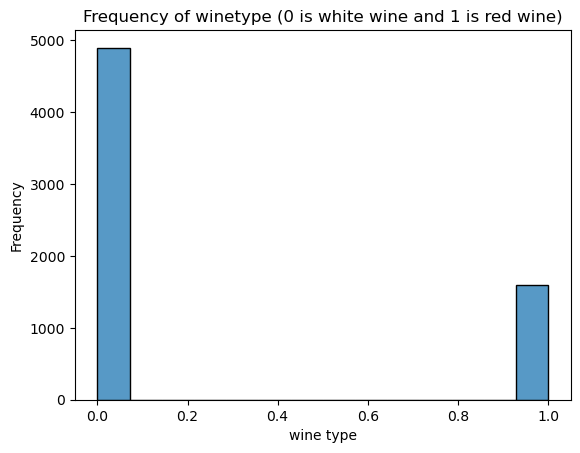

In [60]:
sns.histplot(df['winetype'])
plt.title('Frequency of winetype (0 is white wine and 1 is red wine)')
plt.xlabel('wine type')
plt.ylabel('Frequency')
plt.show()

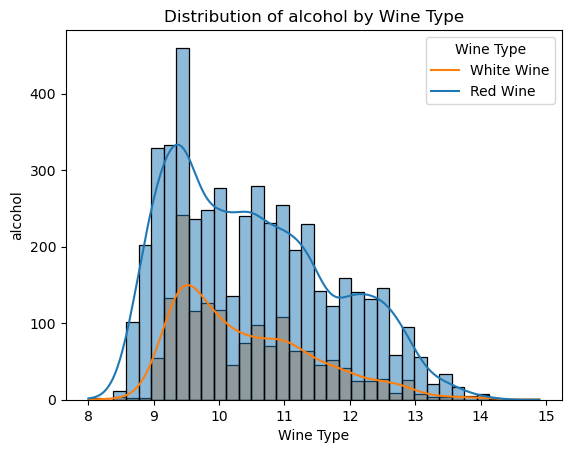

In [61]:
sns.histplot(data=df, x='alcohol', hue='winetype', kde=True)
plt.title('Distribution of alcohol by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('alcohol')
plt.legend(title='Wine Type', labels=['White Wine', 'Red Wine'])
plt.show()

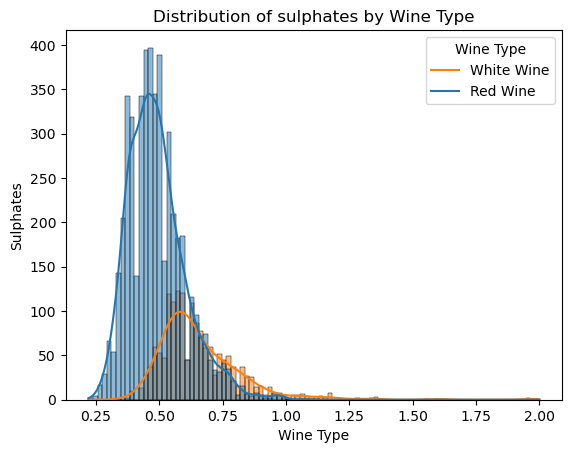

In [62]:
sns.histplot(data=df, x='sulphates', hue='winetype', kde=True)
plt.title('Distribution of sulphates by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Sulphates')
plt.legend(title='Wine Type', labels=['White Wine', 'Red Wine'])
plt.show()

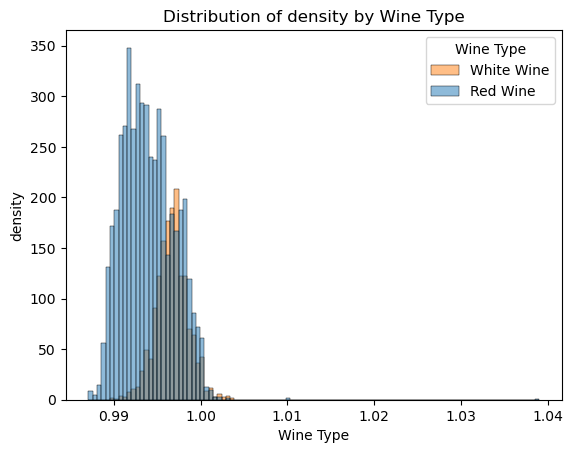

In [63]:
sns.histplot(data=df, x='density', hue='winetype')
plt.title('Distribution of density by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('density')
plt.legend(title='Wine Type', labels=['White Wine', 'Red Wine'])
plt.show()

# Part B Q4

In [64]:
X2 = df.iloc[:, 0:12]
y2 = df['winetype']

In [65]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [66]:
#Logistic Regression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X2_train, y2_train)
print("Training set score: {:.3f}".format(logreg.score(X2_train, y2_train)))
print("Test set score: {:.3f}".format(logreg.score(X2_test, y2_test)))
print("Cross validation score: ", np.mean(cross_val_score(logreg, X2_train, y2_train)))

Training set score: 0.986
Test set score: 0.981
Cross validation score:  0.9858381508976992


In [67]:
#L1-Penalized Logistic Regression
lassoc = LogisticRegression(penalty='l1', solver='liblinear')
lassoc.fit(X2_train, y2_train)
print("Training set score: {:.3f}".format(lassoc.score(X2_train, y2_train)))
print("Test set score: {:.3f}".format(lassoc.score(X2_test, y2_test)))
print("Cross validation score: ", np.mean(cross_val_score(lassoc, X2_train, y2_train)))

Training set score: 0.988
Test set score: 0.985
Cross validation score:  0.9868650555467806


In [68]:
#L2-Penalized Logistic Regression
ridgec = LogisticRegression(penalty='l2', solver='liblinear')
ridgec.fit(X2_train, y2_train)
print("Training set score: {:.3f}".format(ridgec.score(X2_train, y2_train)))
print("Test set score: {:.3f}".format(ridgec.score(X2_test, y2_test)))
print("Cross validation score: ", np.mean(cross_val_score(ridgec, X2_train, y2_train)))

Training set score: 0.983
Test set score: 0.977
Cross validation score:  0.9817326383404412


In [69]:
#KNN Classifier
KNN_C = KNeighborsClassifier(n_neighbors=5)
KNN_C.fit(X2_train,y2_train)
print("Training set score: {:.3f}".format(KNN_C.score(X2_train, y2_train)))
print("Test set score: {:.3f}".format(KNN_C.score(X2_test, y2_test)))
print("Cross validation score: ", np.mean(cross_val_score(KNN_C, X2_train, y2_train)))

Training set score: 0.958
Test set score: 0.936
Cross validation score:  0.941504133101669


They all have similar test score

# Part B Q5

In [70]:
scalerc = preprocessing.StandardScaler().fit(X2_train)
X_train_scaled_2=scalerc.transform(X2_train)
X_test_scaled_2=scalerc.transform(X2_test)

In [71]:
#Logistic Regression
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_scaled_2, y2_train)
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled_2, y2_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled_2, y2_test)))
print("Cross validation score: ", np.mean(cross_val_score(logreg, X_train_scaled_2, y2_train)))

Training set score: 0.994
Test set score: 0.991
Cross validation score:  0.9934310535460433


In [72]:
#L1-Penalized Logistic Regression
lassoc = LogisticRegression(penalty='l1', solver='liblinear')
lassoc.fit(X_train_scaled_2, y2_train)
print("Training set score: {:.3f}".format(lassoc.score(X_train_scaled_2, y2_train)))
print("Test set score: {:.3f}".format(lassoc.score(X_test_scaled_2, y2_test)))
print("Cross validation score: ", np.mean(cross_val_score(lassoc, X_train_scaled_2, y2_train)))

Training set score: 0.994
Test set score: 0.993
Cross validation score:  0.9938417311641132


In [73]:
#L2-Penalized Logistic Regression
ridgec = LogisticRegression(penalty='l1', solver='liblinear')
ridgec.fit(X_train_scaled_2, y2_train)
print("Training set score: {:.3f}".format(ridgec.score(X_train_scaled_2, y2_train)))
print("Test set score: {:.3f}".format(ridgec.score(X_test_scaled_2, y2_test)))
print("Cross validation score: ", np.mean(cross_val_score(ridgec, X_train_scaled_2, y2_train)))

Training set score: 0.994
Test set score: 0.993
Cross validation score:  0.9938417311641132


In [74]:
#KNN Classifier
KNN_C = KNeighborsClassifier(n_neighbors=5)
KNN_C.fit(X_train_scaled_2,y2_train)
print("Training set score: {:.7f}".format(KNN_C.score(X_train_scaled_2, y2_train)))
print("Test set score: {:.7f}".format(KNN_C.score(X_test_scaled_2, y2_test)))
print("Cross validation score: ", np.mean(cross_val_score(KNN_C, X_train_scaled_2, y2_train)))

Training set score: 0.9952791
Test set score: 0.9913846
Cross validation score:  0.9926103301216237


Yes. The standardscaler push the score higher, almost perfect.

# Part B Q6

In [75]:
param_grid_KNN_C = {'n_neighbors':np.arange(1, 15, 2)}
gridKNN_C = GridSearchCV(KNeighborsClassifier(), param_grid_KNN_C)
gridKNN_C.fit(X_train_scaled_2, y2_train)
print(gridKNN_C.best_params_)
print(gridKNN_C.best_score_)
print(gridKNN_C.score(X_test_scaled_2, y2_test))

{'n_neighbors': 13}
0.9932261359448219
0.992


In [76]:
param_grid_logreg = {'fit_intercept':[True,False]}
gridlogreg = GridSearchCV(LogisticRegression(), param_grid_logreg)
gridlogreg.fit(X_train_scaled_2, y2_train)
print(gridlogreg.best_params_)
print(gridlogreg.best_score_)
print(gridlogreg.score(X_test_scaled_2, y2_test))

{'fit_intercept': True}
0.9934310535460433
0.9913846153846154


In [77]:
param_grid_lassoc = {'C':np.logspace(-3,3,7)}
gridlassoc = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear'), param_grid_lassoc)
gridlassoc.fit(X_train_scaled_2, y2_train)
print(gridlassoc.best_params_)
print(gridlassoc.best_score_)
print(gridlassoc.score(X_test_scaled_2, y2_test))

{'C': 1.0}
0.9938417311641132
0.9926153846153846


In [78]:
param_grid_ridgec = {'C':np.logspace(-3,3,7)}
gridridgec = GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'), param_grid_ridgec)
gridridgec.fit(X_train_scaled_2, y2_train)
print(gridridgec.best_params_)
print(gridridgec.best_score_)
print(gridridgec.score(X_test_scaled_2, y2_test))

{'C': 100.0}
0.9936366029589848
0.9932307692307693


There are very minimum improvement of score after using gridsearchCV.

# Part B Q7

In [79]:
logreg_coef = pd.Series(logreg.coef_[0], index = X2_train.columns)
print(logreg_coef.sort_values(ascending=False))

density                 3.452324
volatile acidity        1.286891
alcohol                 1.181357
free sulfur dioxide     0.913264
chlorides               0.800949
sulphates               0.648447
fixed acidity           0.382338
pH                      0.338523
quality                 0.168144
citric acid            -0.365316
total sulfur dioxide   -2.912283
residual sugar         -3.534730
dtype: float64


In [80]:
lassoc_coef = pd.Series(lassoc.coef_[0], index = X2_train.columns)
print(lassoc_coef.sort_values(ascending=False))

density                 4.665797
alcohol                 1.777066
volatile acidity        1.178406
free sulfur dioxide     1.157057
chlorides               0.742905
sulphates               0.485054
quality                 0.166820
pH                      0.000000
fixed acidity          -0.032799
citric acid            -0.397896
total sulfur dioxide   -3.059733
residual sugar         -4.539368
dtype: float64


In [81]:
ridgec_coef = pd.Series(ridgec.coef_[0], index = X2_train.columns)
print(ridgec_coef.sort_values(ascending=False))

density                 4.651865
alcohol                 1.769390
volatile acidity        1.179688
free sulfur dioxide     1.156091
chlorides               0.742327
sulphates               0.487106
quality                 0.166549
pH                      0.000000
fixed acidity          -0.030935
citric acid            -0.397020
total sulfur dioxide   -3.059139
residual sugar         -4.525952
dtype: float64


They showed similar results.

# Part B Q8

I will use Ridge model with: C = 100. However, other models also showed high rate of score.